#### Importing Important Libraries

In [312]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder

from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

#### Importing Dataset

In [313]:
df=pd.read_csv(r'E:/ML/EDA Datasets/Bengaluru_House_Data.csv')

##### Top5 rows

In [314]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


##### Shape of Dataset

In [203]:
df.shape

(13320, 9)

##### Info

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


##### Checking For Null Values

In [316]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [317]:
df.isnull().mean()

area_type       0.000000
availability    0.000000
location        0.000075
size            0.001201
society         0.413063
total_sqft      0.000000
bath            0.005480
balcony         0.045721
price           0.000000
dtype: float64

##### Imputation
Filling Nan Values

##### Location and size

In [318]:
df['location'].mode()[0]

'Whitefield'

In [319]:
df['location'].fillna(df['location'].mode()[0],inplace=True)

In [320]:
df['size'].fillna(df['size'].mode()[0],inplace=True)

##### balcony

In [321]:
df['balcony'].fillna(df['balcony'].median(),inplace=True)

##### Data preprocessing

In [323]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
# def date(i):
#     if i[:2].isnumeric()==True:
#         i=i[:2]
#     else:
#         i='RTM'
#     return i

def month(m):
    if m[3:6] in months:
        m=m[3:6]
    else:
        m='RTM'
    return m
    

In [324]:
# df['Date']=df['availability'].apply(date)

In [325]:
import datetime
df['month']=df['availability'].apply(month)
def mntnum(m):
    if m in months:
        i=m
        return datetime.datetime.strptime(i,'%b').month
    else:
        return 0

In [326]:
df['Monthnum']=df['month'].apply(mntnum)

In [327]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,month,Monthnum
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,Dec,12
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,RTM,0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,RTM,0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,RTM,0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,RTM,0


In [328]:
df['size'].value_counts()

2 BHK         5215
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
43 Bedroom       1
12 Bedroom       1
16 BHK           1
13 BHK           1
19 BHK           1
14 BHK           1
27 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [329]:
def bhk(b):
    if 'Bedroom' in b:
        return b.replace('Bedroom','BHK')
    else:
        return b
    

In [330]:
df['size']=df['size'].apply(bhk)

In [331]:
df['size'].unique()

array(['2 BHK', '4 BHK', '3 BHK', '6 BHK', '1 BHK', '1 RK', '8 BHK',
       '7 BHK', '5 BHK', '11 BHK', '9 BHK', '27 BHK', '10 BHK', '19 BHK',
       '16 BHK', '43 BHK', '14 BHK', '12 BHK', '13 BHK', '18 BHK'],
      dtype=object)

In [332]:
df['Bedrooms']=df['size'].apply(lambda x:x[0])

In [333]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,month,Monthnum,Bedrooms
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,Dec,12,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,Theanmp,2600,5.0,3.0,120.00,RTM,0,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,RTM,0,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,RTM,0,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,RTM,0,2


In [334]:
df['location']=df['location'].apply(lambda x: x.strip())
locations=df['location'].value_counts()

In [335]:
df['location'].value_counts()

Whitefield              542
Sarjapur  Road          399
Electronic City         304
Kanakpura Road          273
Thanisandra             237
                       ... 
Venkateshpuram            1
Indira Nagar Stage 2      1
Banaswadi,                1
Ganganahalli              1
Air View Colony           1
Name: location, Length: 1294, dtype: int64

In [336]:
other=locations[locations<=10]

In [337]:
df['location']=df['location'].apply(lambda x: 'other' if x in other else x)

In [338]:
df['location'].value_counts()

other                        2885
Whitefield                    542
Sarjapur  Road                399
Electronic City               304
Kanakpura Road                273
                             ... 
2nd Phase Judicial Layout      11
Thyagaraja Nagar               11
Nehru Nagar                    11
LB Shastri Nagar               11
HAL 2nd Stage                  11
Name: location, Length: 242, dtype: int64

In [339]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [340]:
def fun(i):
    if ' - ' in i:
        j=i.split(' - ')
        return (float(j[0]) + float(j[1]))/2
    try:
        return float(i)
    except:
        None

In [341]:
df['total_sqft']=df['total_sqft'].apply(fun)

In [342]:
df['Bedrooms']=df['Bedrooms'].astype('int')
df['per_sqrft']=df['total_sqft']/df['Bedrooms']

In [343]:
df['price_per_sqrft']=df['price']*100000/df['total_sqft']

In [344]:
df.describe()

,total_sqft,bath,balcony,price,Monthnum,Bedrooms,per_sqrft,price_per_sqrft
count,13274.000000,13247.000000,13320.000000,13320.000000,13320.000000,13320.000000,13274.000000,1.327400e+04
mean,1559.626694,2.692610,1.603378,112.565627,1.488589,2.779054,581.103776,7.907501e+03
std,1238.405258,1.341458,0.803067,148.971674,3.357139,1.169434,427.535606,1.064296e+05
min,1.000000,1.000000,0.000000,8.000000,0.000000,1.000000,0.250000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,0.000000,2.000000,475.000000,4.266865e+03
50%,1276.000000,2.000000,2.000000,72.000000,0.000000,3.000000,553.166667,5.434306e+03
75%,1680.000000,3.000000,2.000000,120.000000,0.000000,3.000000,625.500000,7.311746e+03
max,52272.000000,40.000000,3.000000,3600.000000,12.000000,9.000000,26136.000000,1.200000e+07


#### OUTLIER Removal

In [345]:
df=df[df['per_sqrft']>=300]

In [346]:
df.shape

(12546, 14)

In [350]:
def outlier_removepps(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqrft)
        st = np.std(subdf.price_per_sqrft)
        reduced_df = subdf[(subdf.price_per_sqrft>(m-st)) & (subdf.price_per_sqrft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = outlier_removepps(df)
df.describe()

,total_sqft,bath,balcony,price,Monthnum,Bedrooms,per_sqrft,price_per_sqrft
count,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000
mean,1442.893022,2.402265,1.641676,82.847558,1.719819,2.488109,578.218807,5466.208092
std,614.709971,0.786090,0.756655,58.918081,3.567728,0.673319,147.731712,1712.911045
min,350.000000,1.000000,0.000000,10.000000,0.000000,1.000000,303.000000,2444.444444
25%,1121.750000,2.000000,1.000000,51.000000,0.000000,2.000000,500.000000,4444.444444
50%,1300.000000,2.000000,2.000000,69.000000,0.000000,2.000000,564.333333,5238.319962
75%,1620.000000,3.000000,2.000000,95.000000,0.000000,3.000000,626.666667,6168.205291
max,14000.000000,9.000000,3.000000,800.000000,12.000000,5.000000,5000.000000,20645.161290


In [351]:
df.dropna(inplace=True)

In [352]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,month,Monthnum,Bedrooms,per_sqrft,price_per_sqrft
0,Super built-up Area,Ready To Move,1st Phase JP Nagar,4 BHK,Prhtsok,2825.0,4.0,3.0,250.0,RTM,0,4,706.250000,8849.557522
1,Super built-up Area,Ready To Move,1st Phase JP Nagar,3 BHK,Prhtsok,1875.0,3.0,1.0,167.0,RTM,0,3,625.000000,8906.666667
2,Super built-up Area,Ready To Move,1st Phase JP Nagar,3 BHK,NCaveun,2024.0,3.0,2.0,157.0,RTM,0,3,674.666667,7756.916996
3,Super built-up Area,Ready To Move,1st Phase JP Nagar,2 BHK,NCaveun,1394.0,2.0,1.0,100.0,RTM,0,2,697.000000,7173.601148
4,Super built-up Area,18-May,1st Phase JP Nagar,2 BHK,Inntsth,1077.0,2.0,2.0,93.0,May,5,2,538.500000,8635.097493


In [353]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price', 'month', 'Monthnum',
       'Bedrooms', 'per_sqrft', 'price_per_sqrft'],
      dtype='object')

#### EDA

In [354]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,month,Monthnum,Bedrooms,per_sqrft,price_per_sqrft
0,Super built-up Area,Ready To Move,1st Phase JP Nagar,4 BHK,Prhtsok,2825.0,4.0,3.0,250.0,RTM,0,4,706.250000,8849.557522
1,Super built-up Area,Ready To Move,1st Phase JP Nagar,3 BHK,Prhtsok,1875.0,3.0,1.0,167.0,RTM,0,3,625.000000,8906.666667
2,Super built-up Area,Ready To Move,1st Phase JP Nagar,3 BHK,NCaveun,2024.0,3.0,2.0,157.0,RTM,0,3,674.666667,7756.916996
3,Super built-up Area,Ready To Move,1st Phase JP Nagar,2 BHK,NCaveun,1394.0,2.0,1.0,100.0,RTM,0,2,697.000000,7173.601148
4,Super built-up Area,18-May,1st Phase JP Nagar,2 BHK,Inntsth,1077.0,2.0,2.0,93.0,May,5,2,538.500000,8635.097493


<AxesSubplot:>

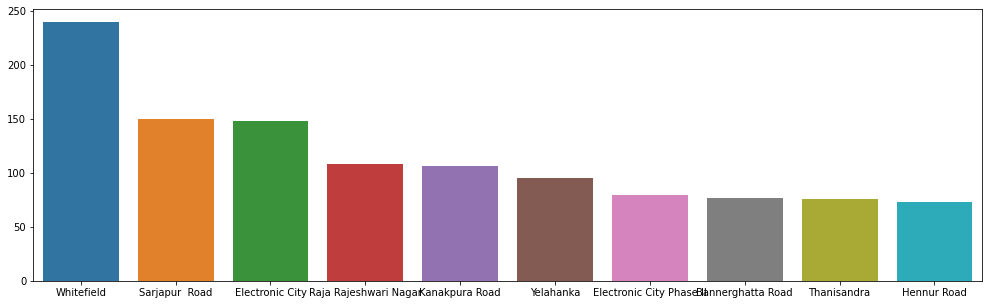

In [355]:
# sns.barplot(df['location'].value_counts()[:10])
plt.figure(figsize=(17,5))
sns.barplot(x=df['location'].value_counts()[1:11].keys(),y=df['location'].value_counts()[1:11].values)

In [356]:
# total available area_type
# which type of area is maximum

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area_type', ylabel='count'>

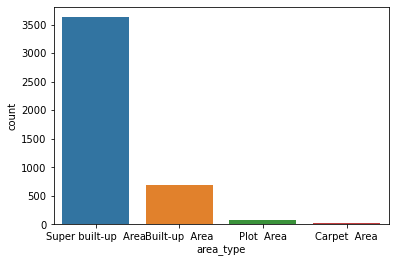

In [357]:
sns.countplot(df['area_type'])

In [358]:
# no of flats avalilable in each month or available right now

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

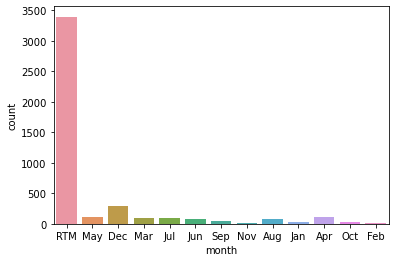

In [359]:
sns.countplot(df['month'])

In [360]:
df.groupby('location')['price'].mean().sort_values(ascending=False)

location
Cunningham Road       684.800000
Benson Town           510.000000
Konanakunte           375.000000
Rajaji Nagar          307.058824
Sarakki Nagar         302.500000
                         ...    
Kereguddadahalli       33.300000
Vishwapriya Layout     33.000000
Kammasandra            28.434444
Chandapura             24.584352
Attibele               19.492727
Name: price, Length: 212, dtype: float64

In [361]:
df.groupby('location')['price_per_sqrft'].mean().sort_values(ascending=False)

location
Cunningham Road              19565.962714
Benson Town                  15815.115824
Rajaji Nagar                 14125.190603
Malleshwaram                 12699.834816
Sarakki Nagar                12094.943826
                                 ...     
Sarjapura - Attibele Road     3165.243109
Banashankari Stage V          3150.318008
Kammasandra                   3138.451771
Attibele                      2738.979918
Chandapura                    2607.086333
Name: price_per_sqrft, Length: 212, dtype: float64

##### removing unnecessary columns

In [362]:
df.drop(columns=['area_type','availability','size','society','balcony','month', 'Monthnum'],inplace=True)

In [363]:
df.head()

,location,total_sqft,bath,price,Bedrooms,per_sqrft,price_per_sqrft
0,1st Phase JP Nagar,2825.0,4.0,250.0,4,706.250000,8849.557522
1,1st Phase JP Nagar,1875.0,3.0,167.0,3,625.000000,8906.666667
2,1st Phase JP Nagar,2024.0,3.0,157.0,3,674.666667,7756.916996
3,1st Phase JP Nagar,1394.0,2.0,100.0,2,697.000000,7173.601148
4,1st Phase JP Nagar,1077.0,2.0,93.0,2,538.500000,8635.097493


##### ONE HOT ENCODING

In [364]:
df.reset_index(inplace=True)

In [365]:
new_df=pd.get_dummies(df)

In [366]:
new_df.drop(columns=['index'],inplace=True)

In [367]:
X=new_df.drop(columns=['price'])
Y=new_df.price

In [368]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=2)

#### Model_Building

##### LinearRegression

In [369]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [370]:
ypred_lr=lr.predict(xtest)

In [371]:
r2_score(ytest,ypred_lr)

-10996177200260.656

##### Support Vector Machine

In [372]:
svm=SVR()
svm.fit(xtrain,ytrain)
ypred_svr=svm.predict(xtest)
r2_score(ytest,ypred_svr)

0.6275083143767711

##### DecisionTreeRegressor

In [373]:
dtr=DecisionTreeRegressor()
dtr.fit(xtrain,ytrain)
ypred_dtr=dtr.predict(xtest)
r2_score(ytest,ypred_dtr)

0.9254267240200362

##### RandomForestRegressor

In [374]:
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
ypred_rf=rf.predict(xtest)
r2_score(ytest,ypred_rf)

0.9479631249013042

In [375]:
rf.predict([xtrain.iloc[0].values])

array([48.6316])

In [376]:
ytest.iloc[0]-rf.predict([xtest.iloc[0].values])

array([0.2132])

In [377]:
mean_absolute_error(ytest,ypred_rf)

1.6235286792452832

In [378]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred_knn=knn.predict(xtest)
r2_score(ytest,ypred_knn)

0.9465979123205791

###### As we can see RandomForest is giving best performance

#### Using PipeLine

In [379]:
xx=df.drop(columns=['price','index'])
yy=df.price

In [380]:
xx

,location,total_sqft,bath,Bedrooms,per_sqrft,price_per_sqrft
0,1st Phase JP Nagar,2825.0,4.0,4,706.250000,8849.557522
1,1st Phase JP Nagar,1875.0,3.0,3,625.000000,8906.666667
2,1st Phase JP Nagar,2024.0,3.0,3,674.666667,7756.916996
3,1st Phase JP Nagar,1394.0,2.0,2,697.000000,7173.601148
4,1st Phase JP Nagar,1077.0,2.0,2,538.500000,8635.097493
...,...,...,...,...,...,...
4410,other,1508.0,3.0,3,502.666667,5106.100796
4411,other,1095.0,2.0,2,547.500000,5205.479452
4412,other,1256.0,2.0,2,628.000000,5175.159236
4413,other,1353.0,2.0,2,676.500000,8130.081301


In [381]:
from sklearn.compose import ColumnTransformer
trf1=ColumnTransformer(transformers=[('location_ohe',OneHotEncoder(),[0])],remainder='passthrough')

In [382]:
trf2=RandomForestRegressor()

In [383]:
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(trf1,trf2)

In [384]:
xtrain,xtest,ytrain,ytest=train_test_split(xx,yy,test_size=0.3,random_state=42)

In [385]:
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('location_ohe',
                                                  OneHotEncoder(), [0])])),
                ('randomforestregressor', RandomForestRegressor())])

In [386]:
ypred=pipe.predict(xtrain)

In [387]:
r2_score(ytrain,ypred)

0.997101964799075

In [390]:
mean_absolute_error(ytrain,ypred)

0.5011651618122982

In [391]:
pipe.predict([['Electronics City Phase 1',755.0,1.0,1,755.000000,5617.218543]])

array([43.2692])

In [393]:
pipe.fit(xtest,ytest)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('location_ohe',
                                                  OneHotEncoder(), [0])])),
                ('randomforestregressor', RandomForestRegressor())])

In [394]:
ypred=pipe.predict(xtest)

In [395]:
r2_score(ytest,ypred)

0.9962656913687882